In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16 

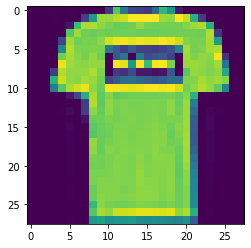

In [7]:
plt.imshow(train_images[1])
print(train_labels[1])
print(train_images[1])

In [8]:
train_images=train_images/255.0
test_images=test_images/255.0

In [24]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(1024,activation='relu'),tf.keras.layers.Dense(10,activation='softmax')])

In [25]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 491us/sample - loss: 0.8067 - accuracy: 0.7302
Epoch 2/20
60000/60000 [==============================] - 27s 450us/sample - loss: 0.5154 - accuracy: 0.8159
Epoch 3/20
60000/60000 [==============================] - 28s 473us/sample - loss: 0.4626 - accuracy: 0.8358
Epoch 4/20
60000/60000 [==============================] - 33s 553us/sample - loss: 0.4336 - accuracy: 0.8460
Epoch 5/20
60000/60000 [==============================] - 31s 511us/sample - loss: 0.4140 - accuracy: 0.8526- loss: 0.4141 - accuracy: 
Epoch 6/20
60000/60000 [==============================] - 26s 434us/sample - loss: 0.3992 - accuracy: 0.8580
Epoch 7/20
60000/60000 [==============================] - 30s 496us/sample - loss: 0.3866 - accuracy: 0.8625
Epoch 8/20
60000/60000 [==============================] - 30s 502us/sample - loss: 0.3768 - accuracy: 0.8651
Epoch 9/20
60000/60000 [==============================] - 29s 487us/sample - l

In [26]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 2s 218us/sample - loss: 50.5474 - accuracy: 0.8098


[50.547439416503906, 0.8098]

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [30]:
callbacks=myCallback()
model.fit(train_images,train_labels,epochs=5,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
59968/60000 [============================>.] - ETA: 0s - loss: 0.2909 - accuracy: 0.8949 ETA: 1s - loss: 0.2915 - ac - ETA: 1s - loss: 0.2916 - accura - ETA: 0s -
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 28s 470us/sample - loss: 0.2908 - accuracy: 0.8949


In [14]:
train_images=train_images.reshape(60000, 28, 28, 1)
train_images=train_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 153s 3ms/sample - loss: 2.3028 - accuracy: 0.0991
Epoch 2/5
60000/60000 [==============================] - 148s 2ms/sample - loss: 2.3028 - accuracy: 0.1001
Epoch 3/5
60000/60000 [==============================] - 159s 3ms/sample - loss: 2.3028 - accuracy: 0.1002
Epoch 4/5
60000/60000 [==============================] - 164s 3ms/sample - loss: 2.3028 - accuracy: 0.0991
Epoch 5/5
60000/60000 [==============================] - 163s 3ms/sample - loss: 2.3028 - accuracy: 0.0976


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [17]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 8s 818us/sample - loss: 2.3026 - accuracy: 0.1000


[2.3026159454345705, 0.1]